# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectFromModel
from sklearn.neural_network import MLPClassifier

## Load the dataset into DF

In [2]:
data = pd.read_excel("Telecom.xlsx", sheet_name="Telecom")

In [3]:
data

,CustomerID,PlanTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersons,NumberOfFollowups,PlanPitched,PreferredServiceStar,MaritalStatus,NumberOfUpgrades,iPhone,PitchSatisfactionScore,PhoneContract,NumberOfChildren,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


# EDA

### Preliminary Observations

1. **Missing Values**: Several columns have missing values (e.g., `Age`, `DurationOfPitch`, `NumberOfFollowups`, `MonthlyIncome`) which will need to be addressed before modeling.
2. **Data Types**: Some features are numerical, while others are categorical, necessitating appropriate preprocessing before applying machine learning models.
3. **Skewness in PlanTaken**: Only 18% of the dataset has the plan purchased (PlanTaken = 1), suggesting a class imbalance that may need to be handled.

## Data Overview

The dataset contains information on 4888 customers with the following attributes:

- `CustomerID`: Unique customer ID.

- `PlanTaken`: Whether the customer has purchased the plan or not (0: No, 1: Yes)
- `Age`: Age of the customer.
- `TypeofContact`: How customer was contacted (Company Invited or Self Inquiry)
- `CityTier`: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3.
- `Occupation`: Occupation of the customer.
- `Gender`: Gender of the customer.
- `NumberOfPersons`: Total number of persons planning to take the plan with the customer (since these are Friends and Family plans)
- `PreferredServiceStar`: Preferred service rating by the customer.
- `MaritalStatus`: Marital status of the customer.
- `NumberOfUpgrades`: Average number of plan upgrades per year by the customer.
- `iPhone`: The customer has an iphone or not (0: No, 1: Yes).
- `PhoneContract`: Whether the customers has a contracted phone or not (0: No, 1: Yes)
- `NumberOfChildren`: Total number of children planning to take the plan with the customer.
- `Designation`: Designation of the customer in the current organization.
- `MonthlyIncome`: Gross monthly income of the customer.
- `PitchSatisfactionScore`: Sales pitch satisfaction score.
- `PlanPitched`: Plan pitched by the salesperson.
- `NumberOfFollowups`: Total number of follow-ups has been done by the salesperson after the sales pitch.
- `DurationOfPitch`: Duration in minutes of the sales pitch.



### Next steps
1. **Data Cleaning**: Address missing values and potentially erroneous data.
2. **Exploratory Data Analysis**: Analyze the relationships between features and the target variable (PlanTaken).
3. **Feature Engineering**: Create new features or remove some of the current ones that might help in predicting the target variable.
4. **Model Preparation**: Encode categorical variables, normalize/scaling of numerical features.
5. **Model Building and Comparison**: Develop both Logistic Regression with Regularization and Deep Neural Network models.
6. **Model Evaluation**: Compare model performances using appropriate metrics.

### Preliminary Observations

1. **Missing Values**: Several columns have missing values (e.g., `Age`, `DurationOfPitch`, `NumberOfFollowups`, `MonthlyIncome`) which will need to be addressed before modeling.
2. **Data Types**: Some features are numerical, while others are categorical, necessitating appropriate preprocessing before applying machine learning models.
3. **Skewness in PlanTaken**: Only 18% of the dataset has the plan purchased (PlanTaken = 1), suggesting a class imbalance that may need to be handled.

### Next steps
1. **Data Cleaning**: Address missing values and potentially erroneous data.
2. **Exploratory Data Analysis**: Analyze the relationships between features and the target variable (PlanTaken).
3. **Feature Engineering**: Create new features or remove some of the current ones that might help in predicting the target variable.
4. **Model Preparation**: Encode categorical variables, normalize/scaling of numerical features.
5. **Model Building and Comparison**: Develop both Logistic Regression with Regularization and Deep Neural Network models.
6. **Model Evaluation**: Compare model performances using appropriate metrics.

### Numerical Info

In [4]:
data.describe()

,CustomerID,PlanTaken,Age,CityTier,DurationOfPitch,NumberOfPersons,NumberOfFollowups,PreferredServiceStar,NumberOfUpgrades,iPhone,PitchSatisfactionScore,PhoneContract,NumberOfChildren,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


### Info about DataFrame

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              4888 non-null   int64  
 1   PlanTaken               4888 non-null   int64  
 2   Age                     4662 non-null   float64
 3   TypeofContact           4863 non-null   object 
 4   CityTier                4888 non-null   int64  
 5   DurationOfPitch         4637 non-null   float64
 6   Occupation              4888 non-null   object 
 7   Gender                  4888 non-null   object 
 8   NumberOfPersons         4888 non-null   int64  
 9   NumberOfFollowups       4843 non-null   float64
 10  PlanPitched             4888 non-null   object 
 11  PreferredServiceStar    4862 non-null   float64
 12  MaritalStatus           4888 non-null   object 
 13  NumberOfUpgrades        4748 non-null   float64
 14  iPhone                  4888 non-null   

#### Proposed Handling Strategies
The percentage of missing values is relatively low, so we will employ imputation techniques to address these missing values.

1. `DurationOfPitch`, `MonthlyIncome`, `Age`, `NumberOfUpgrades`, `NumberOfChildren`, `NumberOfFollowups` and `PreferredServiceStar`:
These are numerical columns. We will impute missing values using the median to avoid the influence of outliers.

2. `TypeofContact`:
This is a categorical column. We will impute missing values using the mode (most frequent category).

# Missing Values

In [6]:
data.isnull().sum()

CustomerID                  0
PlanTaken                   0
Age                       226
TypeofContact              25
CityTier                    0
DurationOfPitch           251
Occupation                  0
Gender                      0
NumberOfPersons             0
NumberOfFollowups          45
PlanPitched                 0
PreferredServiceStar       26
MaritalStatus               0
NumberOfUpgrades          140
iPhone                      0
PitchSatisfactionScore      0
PhoneContract               0
NumberOfChildren           66
Designation                 0
MonthlyIncome             233
dtype: int64

### Fill missing values of numeric columns with median

In [7]:
numeric_cols = ['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredServiceStar','NumberOfUpgrades', 'NumberOfChildren', 'MonthlyIncome']
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

### Fill missing values of categorical columns with mode

In [8]:
categorical_cols = ['TypeofContact', 'Occupation', 'MaritalStatus']
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

### No null values

In [9]:
data.isnull().sum()

CustomerID                0
PlanTaken                 0
Age                       0
TypeofContact             0
CityTier                  0
DurationOfPitch           0
Occupation                0
Gender                    0
NumberOfPersons           0
NumberOfFollowups         0
PlanPitched               0
PreferredServiceStar      0
MaritalStatus             0
NumberOfUpgrades          0
iPhone                    0
PitchSatisfactionScore    0
PhoneContract             0
NumberOfChildren          0
Designation               0
MonthlyIncome             0
dtype: int64

In [10]:
data

,CustomerID,PlanTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersons,NumberOfFollowups,PlanPitched,PreferredServiceStar,MaritalStatus,NumberOfUpgrades,iPhone,PitchSatisfactionScore,PhoneContract,NumberOfChildren,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


#### Correct errors in the Gender values

The `Gender` column includes incorrectly entered values like "Fe Male," which need to be corrected.

In [11]:
for column in data.select_dtypes(include='object').columns:
    print(column)
    print(data[column].unique())

TypeofContact
['Self Enquiry' 'Company Invited']
Occupation
['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Gender
['Female' 'Male' 'Fe Male']
PlanPitched
['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
MaritalStatus
['Single' 'Divorced' 'Married' 'Unmarried']
Designation
['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']


In [12]:
data['Gender'] = data['Gender'].replace('Fe Male', 'Female')
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

# Visulization

## Exploratory Data Analysis
We will cover the following analysis:
1. **Distribution of the Target Variable**: Check the balance of classes.
2. **Univariate Analysis**: Explore individual features to understand their distributions.
3. **Bivariate Analysis**: Analyze relationships between features and the target variable.
3. **Correlation Analysis**: Examine correlations between numeric features.

Let’s start by looking at the distribution of the target variable `PlanTaken` to understand how balanced the dataset is. Then we'll proceed with the univariate analysis of some key variables.


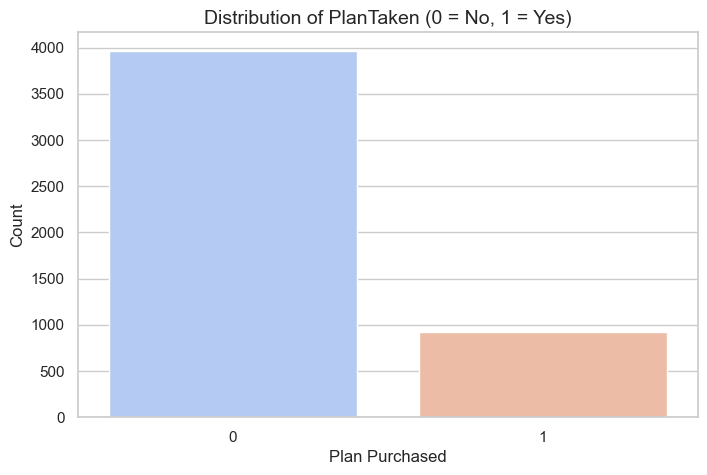

In [13]:
# Set up the visualizations aesthetics
sns.set(style="whitegrid")

# Distribution of the target variable 'PlanTaken'
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x='PlanTaken', data=data, palette="coolwarm")
ax.set_title('Distribution of PlanTaken (0 = No, 1 = Yes)', fontsize=14)
ax.set_xlabel('Plan Purchased', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

The distribution of the target variable `PlanTaken` shows a significant imbalance. Most customers have not purchased the plan (`PlanTaken` = 0), which is consistent with the company report that mentioned only 18% of customers had purchased the plans previously.

### Univariate Analysis

Next, we'll examine some key individual features to understand their distributions and potential influence. We'll look at:

- `Age`
- `CityTier`
- `MonthlyIncome`
- `Occupation`
- `NumberOfPersons`

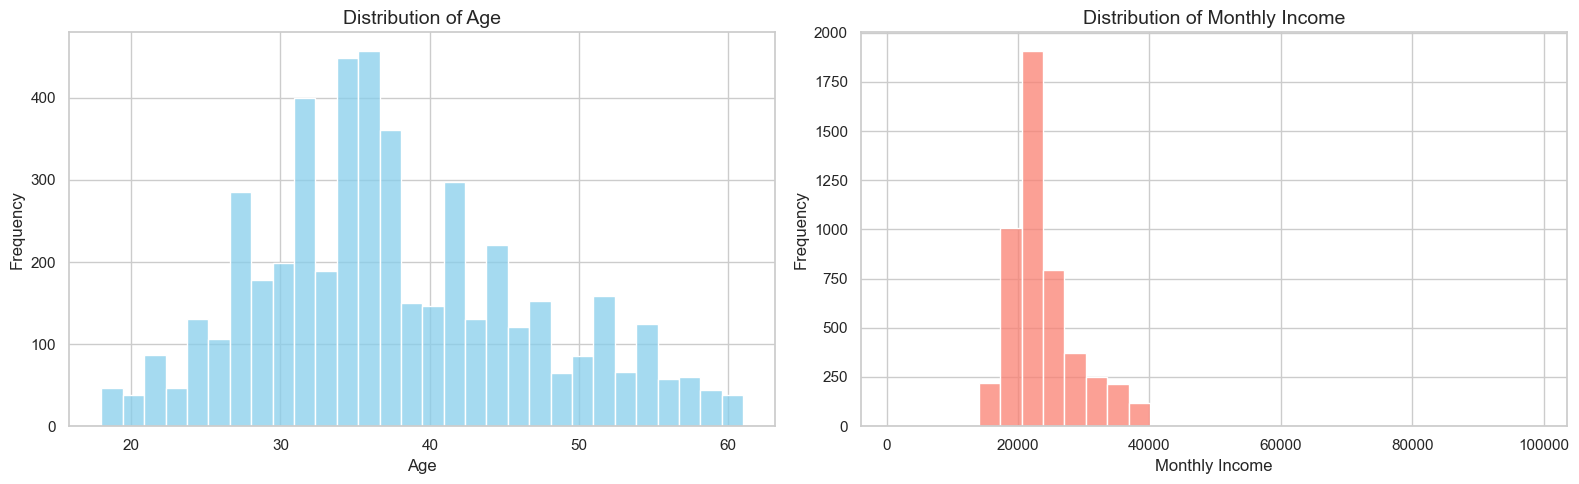

In [14]:
# Set up the figure for multiple plots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Distribution of Age
sns.histplot(data['Age'], bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Age', fontsize=14)
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Distribution of MonthlyIncome
sns.histplot(data['MonthlyIncome'], bins=30, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Monthly Income', fontsize=14)
axes[1].set_xlabel('Monthly Income', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

##### Analysis of Distributions

1. `Age`: The age distribution is relatively smooth, with a slight concentration around the 30-40 age group. This indicates a young to middle-aged customer base, which could be significant in terms of be open to new technologies and likelihood to engage with new plans.
2. `Monthly Income`: The distribution of monthly income is right-skewed, showing that most customers earn on the lower end of the scale with fewer customers earning higher incomes. High-income customers are relatively fewer, which could impact their choice and ability to opt for premium plans.

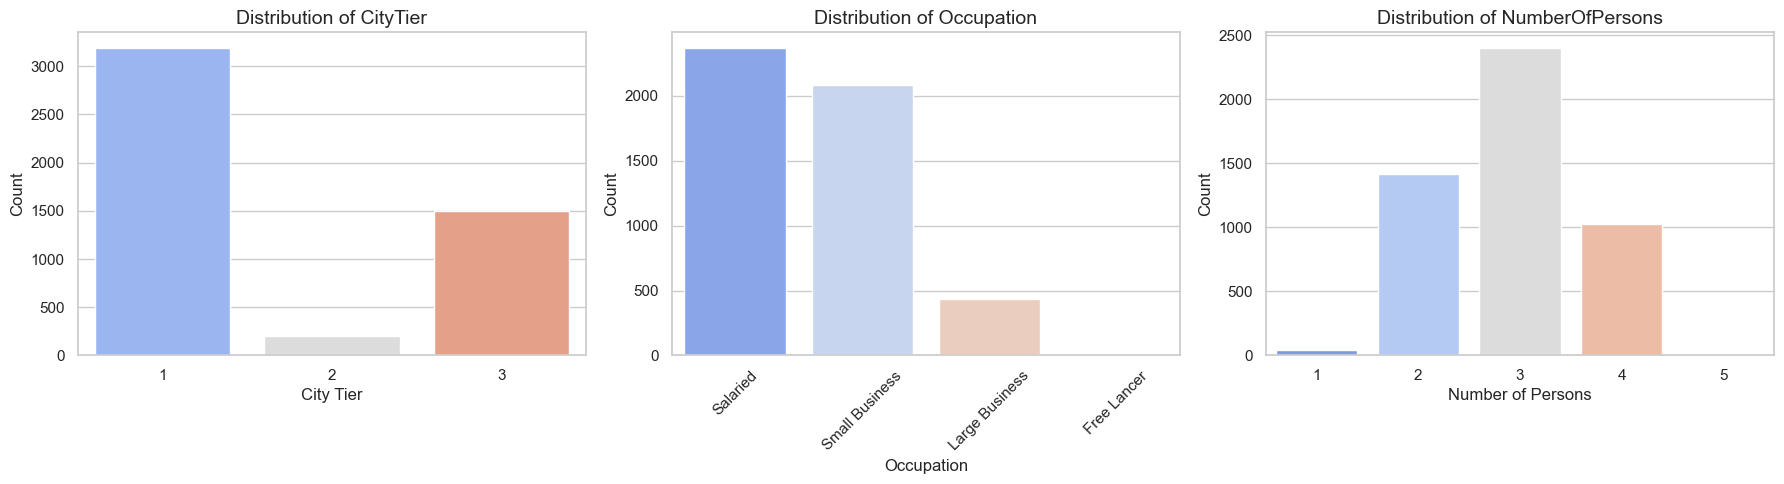

In [15]:
# Set up the figure for multiple plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# CityTier distribution
sns.countplot(x='CityTier', data=data, ax=axes[0], palette='coolwarm')
axes[0].set_title('Distribution of CityTier', fontsize=14)
axes[0].set_xlabel('City Tier', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Occupation distribution
sns.countplot(x='Occupation', data=data, ax=axes[1], palette='coolwarm', order=data['Occupation'].value_counts().index)
axes[1].set_title('Distribution of Occupation', fontsize=14)
axes[1].set_xlabel('Occupation', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# NumberOfPersons distribution
sns.countplot(x='NumberOfPersons', data=data, ax=axes[2], palette='coolwarm')
axes[2].set_title('Distribution of NumberOfPersons', fontsize=14)
axes[2].set_xlabel('Number of Persons', fontsize=12)
axes[2].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()


##### Analysis of Distributions

3. `CityTier`: Most customers are from Tier 1 cities, indicating higher urban concentration. This could suggest better market potential in more developed urban areas where customers might have higher tech engagement and purchasing power.
4. `Occupation`: The majority of customers are salaried, with small business owners also forming significant groups.
5. `NumberOfPersons`: The distribution shows that most plans involve around 2 to 3 persons, indicative of plans possibly being popular among small families or groups.

### Bivariate Analysis

Now, let's explore how some of these features relate to the target variable `PlanTaken` to understand potential predictors for plan purchase:

- `Age` vs. `PlanTaken`
- `MonthlyIncome` vs. `PlanTaken`
- `Occupation` vs. `PlanTaken`
- `CityTier` vs. `PlanTaken`


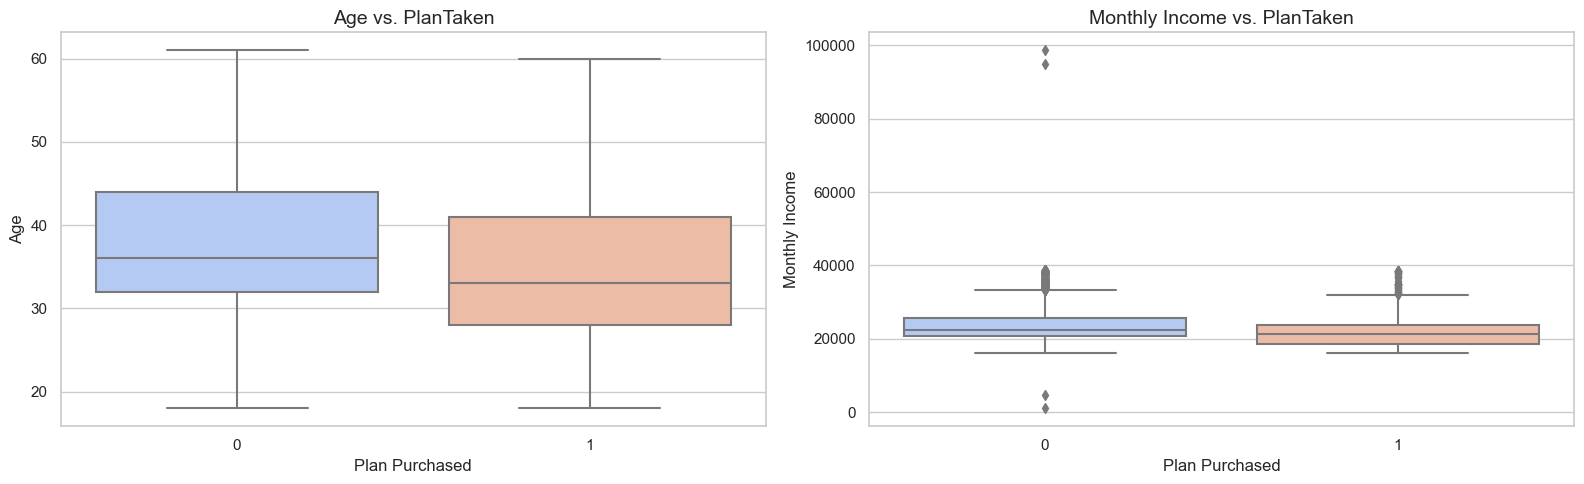

In [16]:
# Set up the figure for multiple plots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Age vs PlanTaken
sns.boxplot(x='PlanTaken', y='Age', data=data, ax=axes[0], palette='coolwarm')
axes[0].set_title('Age vs. PlanTaken', fontsize=14)
axes[0].set_xlabel('Plan Purchased', fontsize=12)
axes[0].set_ylabel('Age', fontsize=12)

# MonthlyIncome vs PlanTaken
sns.boxplot(x='PlanTaken', y='MonthlyIncome', data=data, ax=axes[1], palette='coolwarm')
axes[1].set_title('Monthly Income vs. PlanTaken', fontsize=14)
axes[1].set_xlabel('Plan Purchased', fontsize=12)
axes[1].set_ylabel('Monthly Income', fontsize=12)

plt.tight_layout()
plt.show()


#### Bivariate Analysis Insights: `Age` and `Monthly Income`
1. `Age` vs. `PlanTaken`: The boxplot showed a slight trend towards younger individuals purchasing plans more frequently. Younger age groups may be more inclined to opt into new telecom plans, possibly due to greater openness to adopting new technologies or offerings.
2. `Monthly Income` vs. `PlanTaken`: The boxplot indicated some overlap in income distributions between those who purchased and those who did not, suggesting that while income might influence the ability to purchase plans, it does not distinctly separate purchasers from non-purchasers.

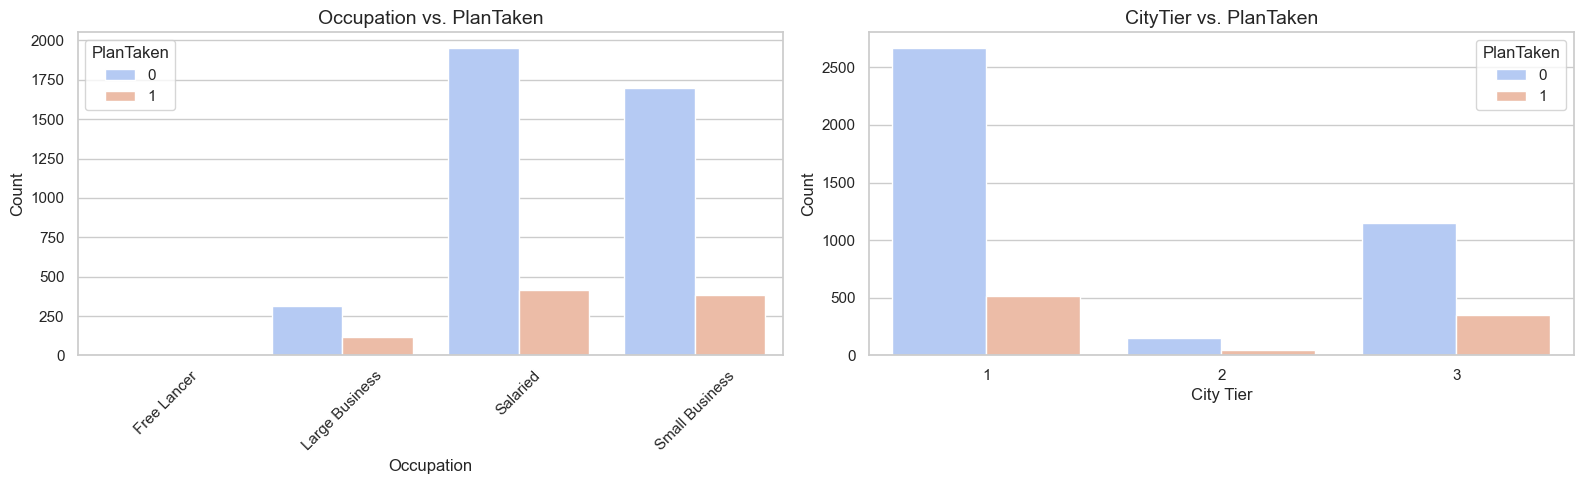

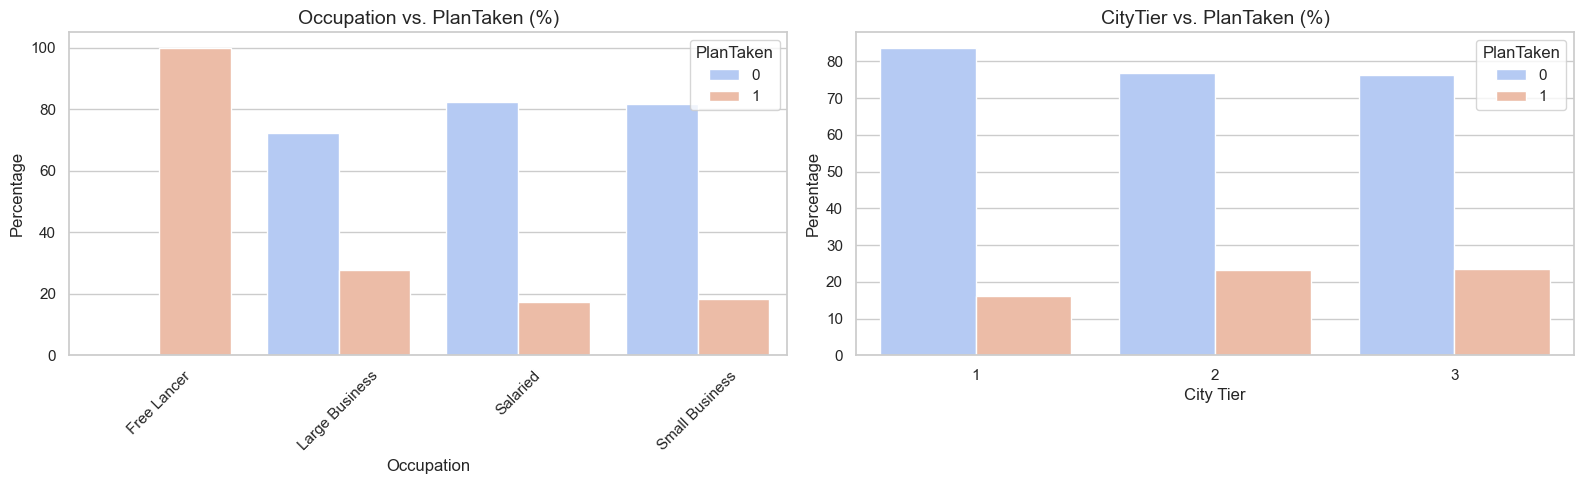

In [17]:
# Set up the figure for multiple plots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Convert PlanTaken to string
data['PlanTaken'] = data['PlanTaken'].astype(str)

# Occupation vs PlanTaken
sns.countplot(x='Occupation', hue='PlanTaken', hue_order = sorted(data['PlanTaken'].unique()), data=data, ax=axes[0], palette='coolwarm', order=sorted(data['Occupation'].unique()))
axes[0].set_title('Occupation vs. PlanTaken', fontsize=14)
axes[0].set_xlabel('Occupation', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# CityTier vs PlanTaken
sns.countplot(x='CityTier', hue='PlanTaken', hue_order = sorted(data['PlanTaken'].unique()), data=data, ax=axes[1], palette='coolwarm', order=sorted(data['CityTier'].unique()))
axes[1].set_title('CityTier vs. PlanTaken', fontsize=14)
axes[1].set_xlabel('City Tier', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

# Prepare the 'Occupation vs PlanTaken' data
occupation_plan = data.groupby(['Occupation', 'PlanTaken']).size().unstack(fill_value=0)
occupation_plan = occupation_plan.div(occupation_plan.sum(axis=1), axis=0) * 100
occupation_plan.reset_index(inplace=True)
occupation_plan_melted = occupation_plan.melt(id_vars='Occupation', var_name='PlanTaken', value_name='Percentage')

# Prepare the 'CityTier vs PlanTaken' data
citytier_plan = data.groupby(['CityTier', 'PlanTaken']).size().unstack(fill_value=0)
citytier_plan = citytier_plan.div(citytier_plan.sum(axis=1), axis=0) * 100
citytier_plan.reset_index(inplace=True)
citytier_plan_melted = citytier_plan.melt(id_vars='CityTier', var_name='PlanTaken', value_name='Percentage')

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Occupation vs PlanTaken
sns.barplot(data=occupation_plan_melted, x='Occupation', y='Percentage', hue='PlanTaken', hue_order = sorted(data['PlanTaken'].unique()), ax=axes[0], palette='coolwarm', order=sorted(data['Occupation'].unique()))
axes[0].set_title('Occupation vs. PlanTaken (%)', fontsize=14)
axes[0].set_xlabel('Occupation', fontsize=12)
axes[0].set_ylabel('Percentage', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# CityTier vs PlanTaken
sns.barplot(data=citytier_plan_melted, x='CityTier', y='Percentage', hue='PlanTaken', hue_order = sorted(data['PlanTaken'].unique()), ax=axes[1], palette='coolwarm', order=sorted(data['CityTier'].unique()))
axes[1].set_title('CityTier vs. PlanTaken (%)', fontsize=14)
axes[1].set_xlabel('City Tier', fontsize=12)
axes[1].set_ylabel('Percentage', fontsize=12)

plt.tight_layout()
plt.show()


#### Bivariate Analysis: `Occupation` and `CityTier`
3. `Occupation` vs. `PlanTaken`: Salaried employees seem to have a higher representation among those who have purchased plans, which could indicate a more stable income conducive to committing to telecom plans. Small business customers also show interest, suggesting that these groups might be primary targets for marketing efforts.
4. `CityTier` vs. `PlanTaken`: Plan purchases are more frequent in Tier 1 cities in absolute numbers, aligning with the hypothesis that more developed urban areas may offer a better customer base for new plans. There’s also a visible market in Tier 2 and 3 cities, although less pronounced.

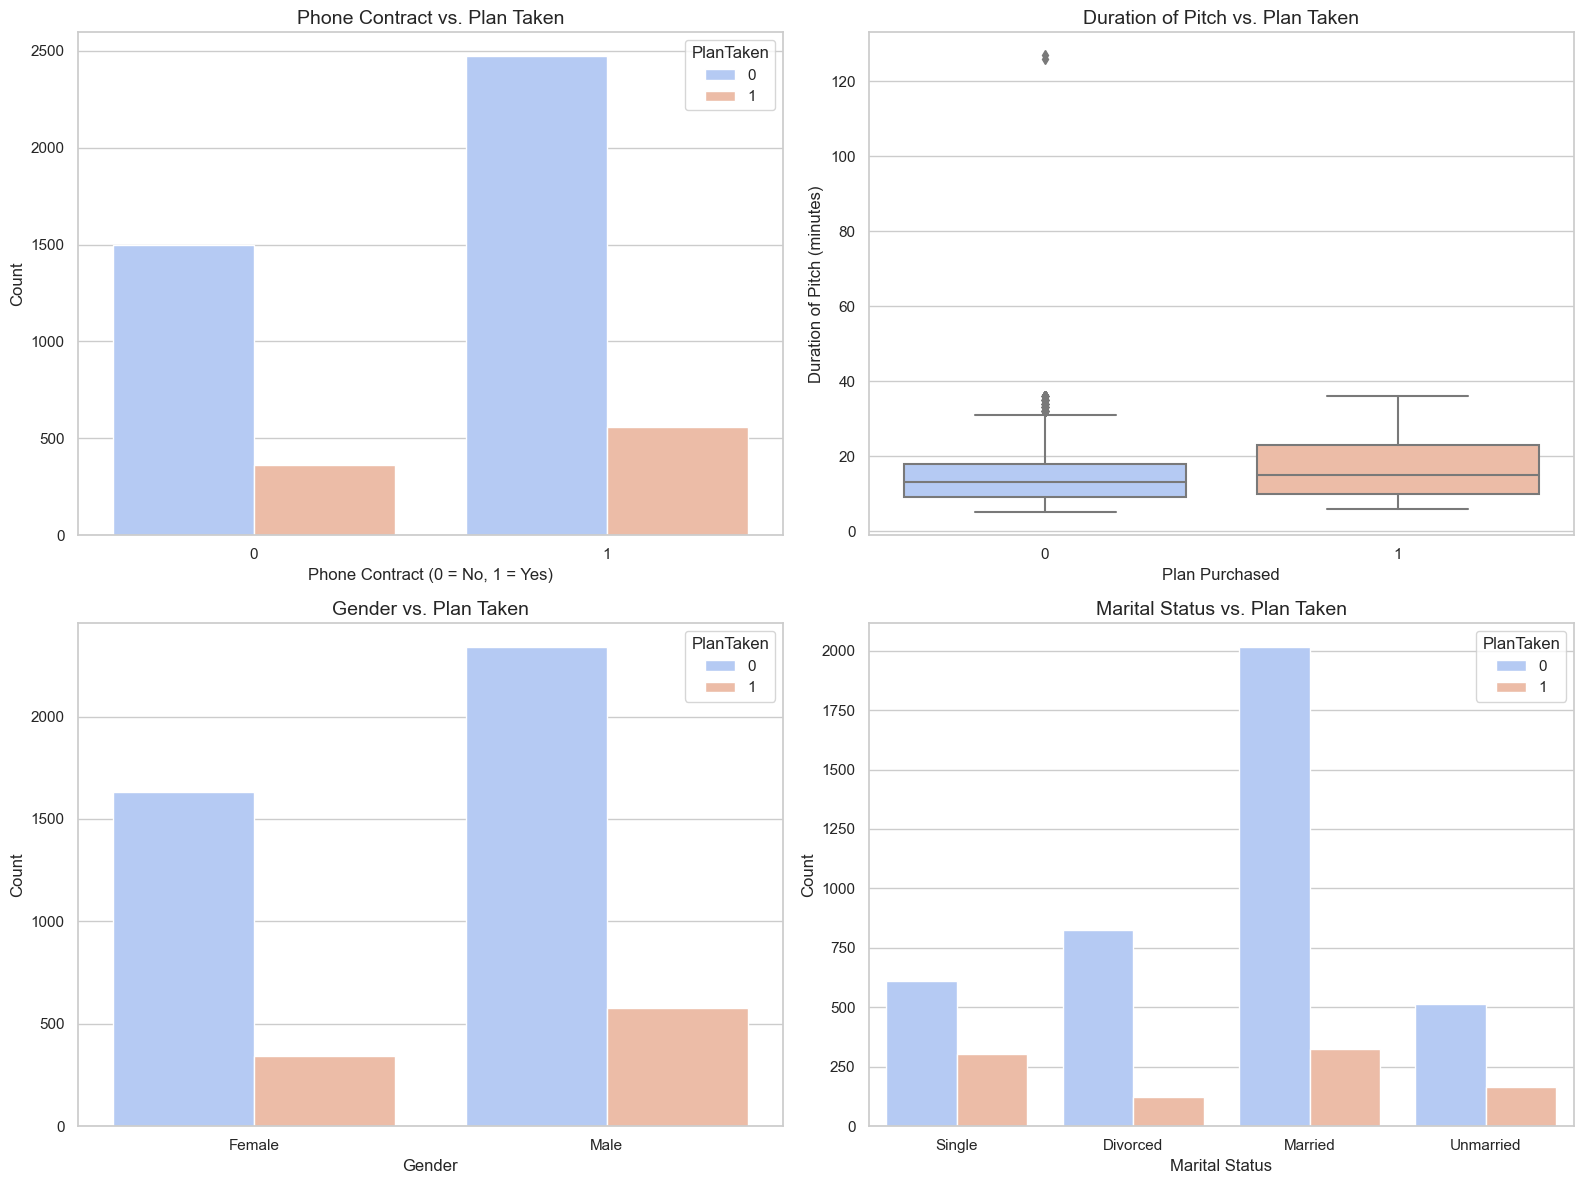

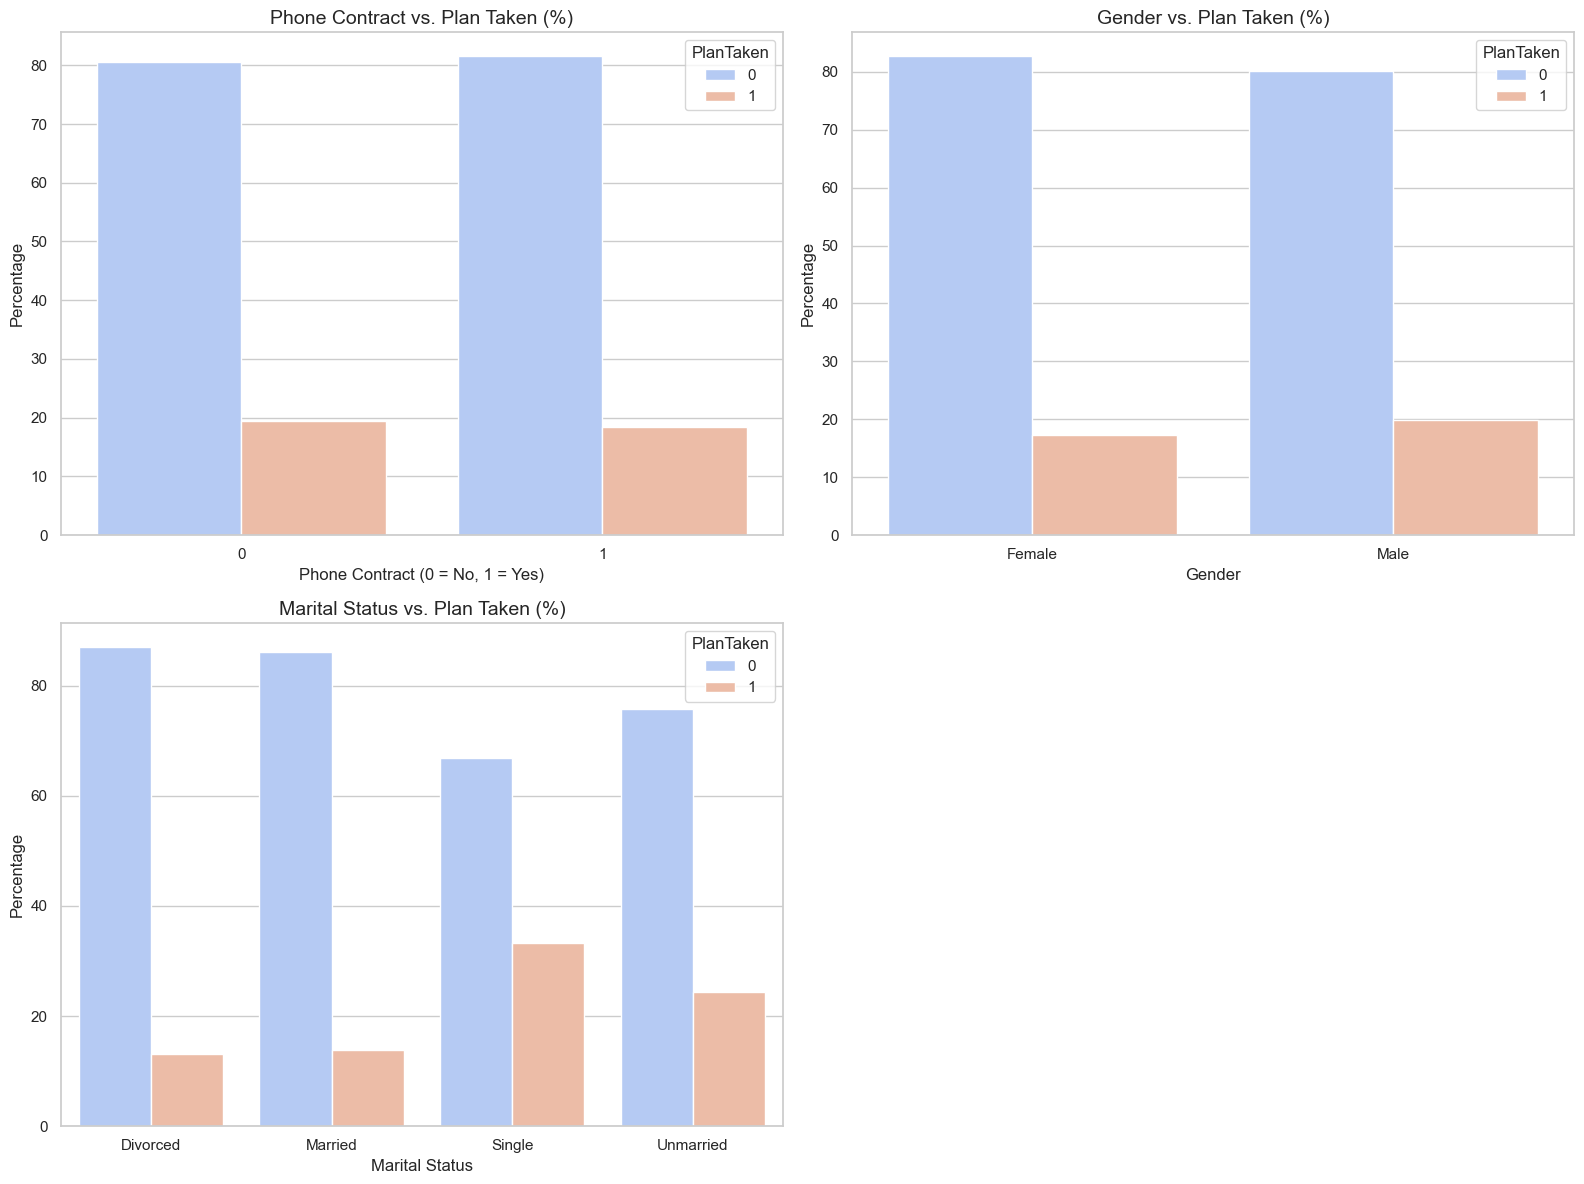

In [18]:
# Set up the figure for multiple plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# PhoneContract vs PlanTaken
sns.countplot(x='PhoneContract', hue='PlanTaken', hue_order = sorted(data['PlanTaken'].unique()), data=data, ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title('Phone Contract vs. Plan Taken', fontsize=14)
axes[0, 0].set_xlabel('Phone Contract (0 = No, 1 = Yes)', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)

# DurationOfPitch vs PlanTaken
sns.boxplot(x='PlanTaken', y='DurationOfPitch', order = sorted(data['PlanTaken'].unique()), data=data, ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Duration of Pitch vs. Plan Taken', fontsize=14)
axes[0, 1].set_xlabel('Plan Purchased', fontsize=12)
axes[0, 1].set_ylabel('Duration of Pitch (minutes)', fontsize=12)

# Gender vs PlanTaken
sns.countplot(x='Gender', hue='PlanTaken', hue_order = sorted(data['PlanTaken'].unique()), data=data, ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Gender vs. Plan Taken', fontsize=14)
axes[1, 0].set_xlabel('Gender', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)

# MaritalStatus vs PlanTaken
sns.countplot(x='MaritalStatus', hue='PlanTaken', hue_order = sorted(data['PlanTaken'].unique()), data=data, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Marital Status vs. Plan Taken', fontsize=14)
axes[1, 1].set_xlabel('Marital Status', fontsize=12)
axes[1, 1].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

# In percentage
# Prepare the 'PhoneContract vs PlanTaken' data
phonecontract_plan = data.groupby(['PhoneContract', 'PlanTaken']).size().unstack(fill_value=0)
phonecontract_plan = phonecontract_plan.div(phonecontract_plan.sum(axis=1), axis=0) * 100
phonecontract_plan.reset_index(inplace=True)
phonecontract_plan_melted = phonecontract_plan.melt(id_vars='PhoneContract', var_name='PlanTaken', value_name='Percentage')

# Prepare the Gender vs PlanTaken data
gender_plan = data.groupby(['Gender', 'PlanTaken']).size().unstack(fill_value=0)
gender_plan = gender_plan.div(gender_plan.sum(axis=1), axis=0) * 100
gender_plan.reset_index(inplace=True)
gender_plan_melted = gender_plan.melt(id_vars='Gender', var_name='PlanTaken', value_name='Percentage')

# Prepare the MaritalStatus vs PlanTaken data
maritalstatus_plan = data.groupby(['MaritalStatus', 'PlanTaken']).size().unstack(fill_value=0)
maritalstatus_plan = maritalstatus_plan.div(maritalstatus_plan.sum(axis=1), axis=0) * 100
maritalstatus_plan.reset_index(inplace=True)
maritalstatus_plan_melted = maritalstatus_plan.melt(id_vars='MaritalStatus', var_name='PlanTaken', value_name='Percentage')

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# PhoneContract vs PlanTaken
sns.barplot(data=phonecontract_plan_melted, x='PhoneContract', y='Percentage', hue='PlanTaken', hue_order = sorted(data['PlanTaken'].unique()), ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title('Phone Contract vs. Plan Taken (%)', fontsize=14)
axes[0, 0].set_xlabel('Phone Contract (0 = No, 1 = Yes)', fontsize=12)
axes[0, 0].set_ylabel('Percentage', fontsize=12)

# Gender vs PlanTaken
sns.barplot(data=gender_plan_melted, x='Gender', y='Percentage', hue='PlanTaken', hue_order = sorted(data['PlanTaken'].unique()), ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Gender vs. Plan Taken (%)', fontsize=14)
axes[0, 1].set_xlabel('Gender', fontsize=12)
axes[0, 1].set_ylabel('Percentage', fontsize=12)

# MaritalStatus vs PlanTaken
sns.barplot(data=maritalstatus_plan_melted, x='MaritalStatus', y='Percentage', hue='PlanTaken', hue_order = sorted(data['PlanTaken'].unique()), ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Marital Status vs. Plan Taken (%)', fontsize=14)
axes[1, 0].set_xlabel('Marital Status', fontsize=12)
axes[1, 0].set_ylabel('Percentage', fontsize=12)

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


#### Bivariate Analysis: `PhoneContract`, `Gender`, `DurationOfPitch` and `MaritalStatus`

1. `PhoneContract` vs. `PlanTaken`: Phone contract does not play a role when it comes to purchase additional plans
2. `DurationOfPitch` vs. `PlanTaken`: On average, pitches that resulted in a plan purchase tended to be slightly longer than those that did not lead to a sale.
3. `Gender` vs. `PlanTaken`: While gender might not directly influence the decision to purchase a telecom plan, understanding gender-specific preferences or needs could help tailor marketing approaches or plan features that appeal more to each gender.
4. `MaritalStatus` vs. `PlanTaken`: Marital status significantly influences telecom plan purchases. Single and unmarried customers are more likely to buy plans, with approximately 25-30% of these customers opting to purchase a plan.

### Conclusions from EDA

Based on the exploratory data analysis (EDA) we've conducted, here are some key insights and conclusions:

1. Target Variable Distribution: There is a significant class imbalance in the `PlanTaken` variable, with a majority of customers not having purchased the plan. This will need special consideration during model training to ensure the model doesn't become biased towards predicting non-purchase.
2. Age: `Age` distribution is relatively even across those who have and haven't purchased the plan. There might be a slight inclination for younger individuals to purchase more, but it doesn't appear as a strong discriminator.
3. Monthly Income: Income levels show significant overlap between purchasers and non-purchasers, indicating that while higher income may slightly favor plan purchase, it is not a definitive predictor by itself.
4. Occupation and CityTier: `Occupation` type shows variability in purchasing behavior, with salaried individuals showing a higher tendency to purchase. This suggests occupational stability might be linked to the willingness to commit to new plans. Although there is a high demand in higher-tier cities (Tier 1), proportionally Tier 2 and Tier 3 cities tend to purchase plans more frequently than those in Tier 1.
5. Phone Contract and Plan Purchase: Having a phone contract does not significantly influence the decision to purchase additional plans, indicating that customer decisions may be driven by other factors.
6. Sales Pitch Duration: Longer sales pitches tend to result in plan purchases more often than shorter ones.
7. Gender: `Gender` does not directly influence plan purchase decisions. However, understanding gender-specific preferences may help tailor marketing strategies to be more effective.
8. Marital Status: `MaritalStatus` significantly influences purchasing decisions, with single and unmarried customers more likely to purchase plans. This insight can guide targeted marketing strategies to cater to these demographics.

# One-hot Encoding

### Categorical_columns

In [19]:
categorical_cols = ['Occupation', 'Gender', 'MaritalStatus']

### Processing Pipeline 

In [20]:
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_cols),('cat', categorical_transformer, categorical_cols)])

In [25]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'DurationOfPitch', 'NumberOfFollowups',
                                  'PreferredServiceStar', 'NumberOfUpgrades',
                                  'NumberOfChildren', 'MonthlyIncome']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Occupation', 'Gender', 'MaritalStatus'])])

In [23]:
for column in data.select_dtypes(include='object').columns:
    print(column)
    print(data[column].unique())

PlanTaken
['1' '0']
TypeofContact
['Self Enquiry' 'Company Invited']
Occupation
['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Gender
['Female' 'Male']
PlanPitched
['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
MaritalStatus
['Single' 'Divorced' 'Married' 'Unmarried']
Designation
['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']


### Split Data 

In [30]:
X = data.drop('PlanTaken', axis=1)
y = data['PlanTaken']

In [31]:
X.columns

Index(['CustomerID', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersons', 'NumberOfFollowups',
       'PlanPitched', 'PreferredServiceStar', 'MaritalStatus',
       'NumberOfUpgrades', 'iPhone', 'PitchSatisfactionScore', 'PhoneContract',
       'NumberOfChildren', 'Designation', 'MonthlyIncome'],
      dtype='object')

### Split data into training and testing sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# class imbalances using RandomOverSampler

In [33]:
oversampler = RandomOverSampler()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Logestic Regression

In [34]:
lr_model = Pipeline(steps=[('preprocessor', preprocessor),('feature_selection', SelectFromModel(LogisticRegression(max_iter=1000))),('classifier', LogisticRegression())])

### Train Model

In [35]:
lr_model.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DurationOfPitch',
                                                   'NumberOfFollowups',
                                                   'PreferredServiceStar',
                                                   'NumberOfUpgrades',
                                                   'NumberOfChildren',
                                                   'MonthlyIncome']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Occupation', 'Gender',
                                                   'MaritalStatus'])])),
                ('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(max_iter=1000))),
                ('classifier', LogisticRegression())])

# Predictions

In [36]:
potential_customers = data.copy()  
potential_customers['Probability_of_Purchase'] = lr_model.predict_proba(X)[:, 1]

In [39]:
lr_model.predict_proba(X)

array([[0.37855385, 0.62144615],
       [0.54242467, 0.45757533],
       [0.09050769, 0.90949231],
       ...,
       [0.72940151, 0.27059849],
       [0.27882691, 0.72117309],
       [0.45725997, 0.54274003]])

In [37]:
potential_customers['Probability_of_Purchase']

0       0.621446
1       0.457575
2       0.909492
3       0.412644
4       0.411721
          ...   
4883    0.591429
4884    0.767717
4885    0.270598
4886    0.721173
4887    0.542740
Name: Probability_of_Purchase, Length: 4888, dtype: float64

# Outputs

In [27]:
print("Chances of old Customers buy Newly Introduced Telecom Plan with Logestic Regressions:")
print(potential_customers[['CustomerID', 'Probability_of_Purchase']])

Chances of old Customers buy Newly Introduced Telecom Plan with Logestic Regressions:
      CustomerID  Probability_of_Purchase
0         200000                 0.637064
1         200001                 0.454993
2         200002                 0.921816
3         200003                 0.410597
4         200004                 0.405255
...          ...                      ...
4883      204883                 0.582851
4884      204884                 0.776036
4885      204885                 0.268533
4886      204886                 0.727891
4887      204887                 0.539213

[4888 rows x 2 columns]


### Model Peformance

In [28]:
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, lr_pred))


Logistic Regression Accuracy: 0.6492842535787321
              precision    recall  f1-score   support

           0       0.86      0.67      0.75       787
           1       0.29      0.57      0.39       191

    accuracy                           0.65       978
   macro avg       0.58      0.62      0.57       978
weighted avg       0.75      0.65      0.68       978



# Neural Network

In [29]:
nn_model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', MLPClassifier(max_iter=1000))])

### Training Model

In [30]:
nn_model.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DurationOfPitch',
                                                   'NumberOfFollowups',
                                                   'PreferredServiceStar',
                                                   'NumberOfUpgrades',
                                                   'NumberOfChildren',
                                                   'MonthlyIncome']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Occupation', 'Gender',
                                                   'MaritalStatus'])])),
                ('classifier', MLPClassifier(max_iter=1000))])

### Evaluation

In [31]:
nn_pred = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_pred)
print("Neural Network Accuracy:", nn_accuracy)
print(classification_report(y_test, nn_pred))

Neural Network Accuracy: 0.8231083844580777
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       787
           1       0.55      0.56      0.55       191

    accuracy                           0.82       978
   macro avg       0.72      0.72      0.72       978
weighted avg       0.82      0.82      0.82       978



# Predict potential customers

In [32]:
potential_customers_nn = data.copy()
potential_customers_nn['Probability_of_Purchase'] = nn_model.predict_proba(X)[:, 1]

# Output the potential customers

In [33]:
print("Chances of old Customers buy Newly Introduced Telecom Plan with Neural Network Model")
print(potential_customers_nn[['CustomerID', 'Probability_of_Purchase']])

Chances of old Customers buy Newly Introduced Telecom Plan with Neural Network Model
      CustomerID  Probability_of_Purchase
0         200000                 0.930360
1         200001                 0.141029
2         200002                 0.999975
3         200003                 0.000584
4         200004                 0.024204
...          ...                      ...
4883      204883                 0.998038
4884      204884                 0.994537
4885      204885                 0.183437
4886      204886                 0.998785
4887      204887                 0.748790

[4888 rows x 2 columns]
